In [278]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline

In [279]:
j = 30
k = 60

features = pd.read_csv('daily_j' + str(j) + '_k' + str(k)+'_features.csv')
pct = pd.read_csv('daily_j' + str(j) + '_k' + str(k)+'_pct.csv')

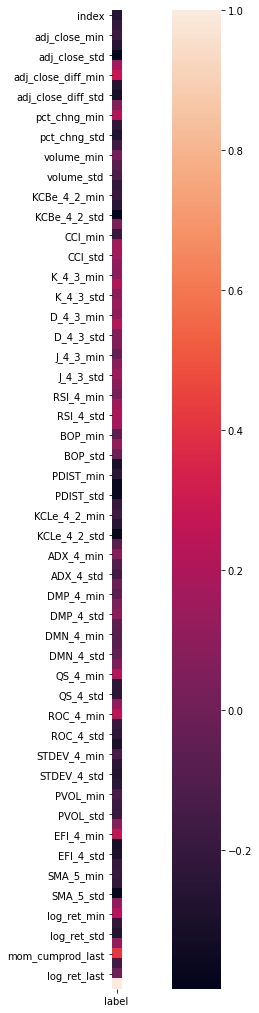

In [280]:
corr = features.corr() 
fig, ax = plt.subplots(figsize = (18, 18)) 
sns.heatmap(corr[['label']], square=True) 

In [281]:
correlated_features = set()
for i in range(len(corr.columns)):
    for a in range(i):
        if abs(corr.iloc[i, a]) > 0.90:
            colname = corr.columns[i]
            correlated_features.add(colname)

In [282]:
num_colums = ['uint8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = list(features.select_dtypes(include=num_colums).columns)
df = features[numerical_columns]
df

,index,adj_close_mean,adj_close_min,adj_close_max,adj_close_std,adj_close_diff_mean,adj_close_diff_min,adj_close_diff_max,adj_close_diff_std,pct_chng_mean,...,SMA_5_std,log_ret_mean,log_ret_min,log_ret_max,log_ret_std,cumprod_last,mom_cumprod_last,rev_cumprod_last,log_ret_last,label
0,0,1138.982852,1073.869995,1178.099976,28.528165,1.100244,-24.719971,41.419922,10.992904,0.000976,...,25.561043,0.000930,-0.022390,0.037053,0.009699,0.039815,0.358708,-0.094005,0.007386,1.0
1,1,1117.527146,1067.949951,1173.599976,36.718511,-3.760999,-43.460083,48.849976,22.986997,-0.002956,...,30.654898,-0.003154,-0.039756,0.043035,0.020127,-0.064093,-0.084155,-0.070879,0.025514,0.0
2,2,1086.437500,1028.060059,1115.010010,21.431599,-0.064736,-74.769897,32.209961,22.780826,0.000146,...,14.183257,-0.000056,-0.070206,0.030850,0.020767,-0.001115,0.116015,0.095036,0.000063,1.0
3,3,1122.253634,1080.290039,1148.670044,20.226617,0.730475,-45.569946,23.840088,13.946638,0.000687,...,17.905030,0.000615,-0.041318,0.020973,0.012248,0.013625,0.162345,0.123332,-0.003088,1.0
4,4,1197.254749,1146.239990,1225.849976,18.670556,2.076001,-19.410034,38.140015,14.138749,0.001761,...,11.539320,0.001694,-0.016338,0.032732,0.011633,0.036223,0.064115,0.030093,-0.001380,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,62,3009.339995,2820.000000,3232.389893,118.798944,13.849500,-60.069824,90.209961,40.041249,0.004393,...,100.714104,0.004301,-0.020713,0.031015,0.013140,0.094530,0.208640,0.382049,-0.007830,0.0
63,63,3249.735906,3155.219971,3351.280029,52.096386,7.673340,-40.360107,42.300049,23.068791,0.002266,...,38.987080,0.002240,-0.012396,0.013317,0.006989,0.050512,0.022253,0.032776,0.000633,0.0
64,64,3345.662276,3236.919922,3419.439941,48.933242,4.171422,-78.650146,67.119873,43.851414,0.001259,...,33.779225,0.001180,-0.024007,0.019945,0.012817,0.026292,0.074093,-0.002936,0.017247,1.0
65,65,3599.062500,3446.830078,3699.120117,58.621400,13.278423,-41.739990,103.669922,35.918752,0.003585,...,42.693185,0.003532,-0.011631,0.029633,0.009871,0.073195,0.138465,0.529320,0.008797,0.0


In [283]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = decomposition.PCA()
X_train, X_test, y_train, y_test = train_test_split(df.drop('label',axis=1), 
                                                    df['label'], train_size=0.538, shuffle=False)
X_before = X_test
X_test = X_test.dropna()
X_train = X_train.dropna()

X_train.drop(columns=correlated_features, axis=1, inplace=True)
X_test.drop(columns=correlated_features, axis=1, inplace=True)


scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

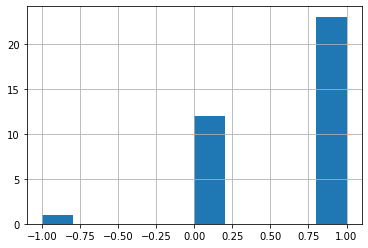

In [284]:
y_train.hist()

In [285]:
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('std_slc', scaler),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])
n_components = list(range(1,X_train.shape[1]+1,1))

In [286]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [287]:
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

In [288]:
clf_GS = GridSearchCV(pipe, parameters,n_jobs=-1,verbose=True)
clf_GS.fit(X_train, y_train)

Fitting 5 folds for each of 624 candidates, totalling 3120 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 3120 out of 3120 | elapsed:    3.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('std_slc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('dec_tree',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                             

In [289]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])


Best Criterion: gini
Best max_depth: 2
Best Number Of Components: 1

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [290]:
predictions = clf_GS.predict(X_test)
predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1.])

In [291]:
# scores = cross_val_score(clf_GS, X_train, y_train, cv=10)
#print('Cross-Validation Accuracy Scores', scores)

In [292]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.35714285714285715, 0.5752747252747252, 0.7692307692307693)

In [293]:
X_before['label'] = predictions.tolist()
X_before

,index,adj_close_mean,adj_close_min,adj_close_max,adj_close_std,adj_close_diff_mean,adj_close_diff_min,adj_close_diff_max,adj_close_diff_std,pct_chng_mean,...,SMA_5_std,log_ret_mean,log_ret_min,log_ret_max,log_ret_std,cumprod_last,mom_cumprod_last,rev_cumprod_last,log_ret_last,label
36,36,1910.180466,1829.079956,1986.449951,42.474732,4.170996,-35.399902,46.119995,22.799646,0.002110,...,31.791293,0.002043,-0.018654,0.023588,0.011680,0.043835,0.024036,0.088612,0.004086,1.0
37,37,2071.755232,1993.400024,2102.399902,26.472463,3.595001,-24.749878,72.729858,20.907820,0.001737,...,21.632045,0.001687,-0.012048,0.035835,0.009981,0.036069,0.108256,0.007346,-0.005076,1.0
38,38,2083.784350,2000.540039,2119.120117,28.522480,0.792281,-75.910034,35.549927,24.572277,0.000427,...,18.764931,0.000363,-0.036581,0.017614,0.011625,0.008374,0.049366,-0.015674,0.013474,1.0
39,39,2174.453169,2102.949951,2190.149902,18.116647,3.687140,-13.810059,67.890137,16.719213,0.001673,...,12.817905,0.001644,-0.006382,0.031773,0.007615,0.036820,0.035026,0.032711,0.005214,1.0
40,40,2146.643905,2126.409912,2176.120117,13.539698,-2.259555,-26.929932,17.140137,10.896767,-0.000993,...,10.417679,-0.001005,-0.012525,0.007936,0.004950,-0.022844,-0.047349,-0.051398,-0.003113,1.0
41,41,2240.304281,2191.080078,2271.719971,29.797806,3.357996,-18.439941,29.120117,10.192376,0.001441,...,29.706028,0.001431,-0.008150,0.013077,0.004449,0.030503,0.044778,0.000176,0.002246,1.0
42,42,2316.156680,2249.919922,2367.340088,35.651310,5.871008,-13.790039,44.770020,11.847882,0.002438,...,31.039890,0.002422,-0.006028,0.019703,0.005085,0.052189,0.000143,-0.018148,0.001492,1.0
43,43,2357.351888,2328.949951,2388.610107,14.275266,1.443994,-15.979980,25.459961,10.685483,0.000589,...,8.054013,0.000580,-0.006838,0.010782,0.004429,0.012245,0.027178,0.041146,-0.000486,1.0
44,44,2430.945508,2388.770020,2453.459961,13.296670,2.606844,-16.429932,24.139893,10.014554,0.001034,...,8.737777,0.001026,-0.006719,0.010055,0.004025,0.020735,0.044764,-0.008996,0.001560,1.0
45,45,2459.348728,2425.550049,2480.909912,18.931267,-0.004550,-38.100098,38.760010,16.520671,0.000019,...,12.974706,-0.000002,-0.015557,0.015766,0.006579,-0.000041,-0.009453,-0.038212,-0.002077,1.0


In [294]:
performance =pct[['date','index', 'mom_pct_change','rev_pct_change','SP500_pct_change']].infer_objects()
performance['date'] = pd.to_datetime(performance['date'])
# output = date.merge(performance, how='right',left_index=True, right_index=True)[['date','index', 'mom_pct_change','rev_pct_change','SP500_pct_change']]
# output
# output.to_csv(csv_)
performance = performance.set_index('date')
performance = performance.merge(X_before[['label']], left_on='index', right_index=True) #example
performance['test_pct_change'] = performance.apply(lambda x: x['mom_pct_change'] if x['label']==1 else x['rev_pct_change'] if x['label']==-1 else 0,axis=1) # todo build more models and get their outputs. output results here

performance[['mom_return','rev_return', 'test_return']] = performance[['mom_pct_change','rev_pct_change', 'test_pct_change']].apply(lambda x: (x+1).cumprod()-1)*100
#performance[['mom_return','rev_return', 'test_return']] = performance[['mom_pct_change','rev_pct_change', 'test_pct_change']].apply(lambda x: np.log(1 + x).cumsum())
performance
performance[['mom_return_diff','rev_return_diff', 'test_return_diff']] = performance[['mom_pct_change','rev_pct_change', 'test_pct_change']].diff()
# performance['mom_sharpe_ratio'] = performance['mom_return'].mean()/performance['mom_return'].std() * np.sqrt(252)

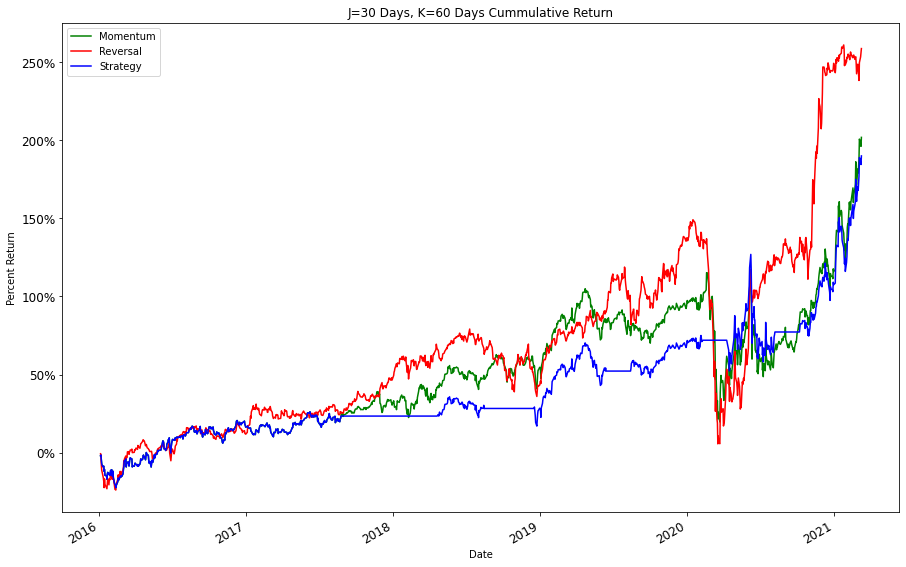

In [295]:
# import matplotlib.ticker as mtick

plt = performance[['mom_return','rev_return', 'test_return']].plot(figsize=(15,10),title='J={0} Days, K={1} Days Cummulative Return'.format(j,k),xlabel="Date",ylabel="Percent Return",fontsize=12,color=['green','red','blue'])
plt.legend(['Momentum','Reversal','Strategy'])
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
plt.yaxis.set_major_formatter(yticks)
plt.get_figure().savefig('dt_performance_j{0}_k{1}.png'.format(j,k))